In [26]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import os

In [27]:
def get_date_range_in_str(start_str, end_str):

    """
    takes two strings of dates in the format "yyyymmdd" and returns a list of all dates in between in the same format
    """

    from datetime import datetime, timedelta
    
    # Parse input strings into datetime objects
    start_date = datetime.strptime(start_str, "%Y%m%d")
    end_date = datetime.strptime(end_str, "%Y%m%d")
    
    # Compute number of days between dates
    num_days = (end_date - start_date).days + 1  # +1 to include end date
    
    # Generate list of date strings
    date_list = [
        (start_date + timedelta(days=i)).strftime("%Y%m%d")
        for i in range(num_days)
    ]
    return date_list

#### read and display dataset for single day and hemisphere

In [57]:
date = '20230113'
hemis = 'N'
ds = xr.open_dataset(f'/mnt/spaces/Users/hniehaus/SAGE/RRDP/output/S/netcdfs/{date[:4]}/{date}_{hemis}.nc', 
                     mask_and_scale=False)

ds

<xarray.Dataset> Size: 11MB
Dimensions:                    (time: 1, yc: 240, xc: 240)
Coordinates:
  * time                       (time) datetime64[ns] 8B 2023-01-13T12:00:00
  * xc                         (xc) float64 2kB -3e+06 -2.975e+06 ... 3e+06
  * yc                         (yc) float64 2kB 3e+06 2.975e+06 ... -3e+06
Data variables: (12/53)
    icetype_matches            (time, yc, xc) int16 115kB ...
    myi_concentration_matches  (time, yc, xc) float32 230kB ...
    NIC_dom_icetype            (time, yc, xc) int8 58kB ...
    NIC_dom_icetype_conc       (time, yc, xc) float32 230kB ...
    NIC_myi_conc               (time, yc, xc) float32 230kB ...
    NIC_total_ice_conc         (time, yc, xc) float32 230kB ...
    ...                         ...
    ERA5_tclw_mean             (time, yc, xc) float32 230kB ...
    ERA5_tciw_min              (time, yc, xc) float32 230kB ...
    ERA5_tciw_max              (time, yc, xc) float32 230kB ...
    ERA5_tciw_mean             (time, yc, xc) float32 230kB ...
    ASCAT_S0                   (time, yc, xc) float32 230kB ...
    crs                        int32 4B ...
Attributes:
    title:              Round Robin Data Package for Sea Ice Types
    summary:            Multi-source sea ice type classification product grid...
    date_created:       2025-12-05T19:41:09Z
    date:               20230113
    hemisphere:         N
    resolution_m:       25000
    projection:         +proj=laea +lat_0=90 +lon_0=0 +x_0=0 +y_0=0 +ellps=WG...
    datasets_included:  NIC, autoDMI, S1
    ice_type_codes:     1=YI (Young Ice), 2=FYI (First-Year Ice), 3=SYI (Seco...

#### read and display dataset for multiple days

In [49]:
# read dataset for multiple days within date range
start_date = '20220101'
end_date = '20220110'
hemis = 'N'
date_list = get_date_range_in_str(start_date, end_date)

# Open all datasets in the date range, skipping missing files
available_files = [f'/mnt/spaces/Users/hniehaus/SAGE/RRDP/output/S/netcdfs/{date[:4]}/{date}_{hemis}.nc' 
                   for date in date_list 
                   if os.path.exists(f'/mnt/spaces/Users/hniehaus/SAGE/RRDP/output/S/netcdfs/{date[:4]}/{date}_{hemis}.nc')]

ds2 = xr.open_mfdataset(
    available_files,
    combine='by_coords',
    join='outer',
    compat='override',
    coords='minimal',
    data_vars='minimal',
    mask_and_scale=False
)

ds2

<xarray.Dataset> Size: 133MB
Dimensions:                    (time: 9, xc: 240, yc: 240)
Coordinates:
  * time                       (time) datetime64[ns] 72B 2022-01-02T12:00:00 ...
  * xc                         (xc) float64 2kB -3e+06 -2.975e+06 ... 3e+06
  * yc                         (yc) float64 2kB 3e+06 2.975e+06 ... -3e+06
Data variables: (12/65)
    icetype_matches            (time, yc, xc) float32 2MB dask.array<chunksize=(1, 240, 240), meta=np.ndarray>
    myi_concentration_matches  (time, yc, xc) float32 2MB dask.array<chunksize=(1, 240, 240), meta=np.ndarray>
    DMI_dom_icetype            (time, yc, xc) float32 2MB dask.array<chunksize=(1, 240, 240), meta=np.ndarray>
    DMI_dom_icetype_conc       (time, yc, xc) float32 2MB dask.array<chunksize=(1, 240, 240), meta=np.ndarray>
    DMI_myi_conc               (time, yc, xc) float32 2MB dask.array<chunksize=(1, 240, 240), meta=np.ndarray>
    DMI_total_ice_conc         (time, yc, xc) float32 2MB dask.array<chunksize=(1, 240, 240), meta=np.ndarray>
    ...                         ...
    S1_dom_icetype_conc        (time, yc, xc) float32 2MB dask.array<chunksize=(1, 240, 240), meta=np.ndarray>
    S1_myi_conc                (time, yc, xc) float32 2MB dask.array<chunksize=(1, 240, 240), meta=np.ndarray>
    NIC_dom_icetype            (time, yc, xc) float32 2MB dask.array<chunksize=(1, 240, 240), meta=np.ndarray>
    NIC_dom_icetype_conc       (time, yc, xc) float32 2MB dask.array<chunksize=(1, 240, 240), meta=np.ndarray>
    NIC_myi_conc               (time, yc, xc) float32 2MB dask.array<chunksize=(1, 240, 240), meta=np.ndarray>
    NIC_total_ice_conc         (time, yc, xc) float32 2MB dask.array<chunksize=(1, 240, 240), meta=np.ndarray>
Attributes:
    title:              Round Robin Data Package for Sea Ice Types
    summary:            Multi-source sea ice type classification product grid...
    date_created:       2025-12-05T19:22:26Z
    date:               20220102
    hemisphere:         N
    resolution_m:       25000
    projection:         +proj=laea +lat_0=90 +lon_0=0 +x_0=0 +y_0=0 +ellps=WG...
    datasets_included:  DMI, autoDMI
    ice_type_codes:     1=YI (Young Ice), 2=FYI (First-Year Ice), 3=SYI (Seco...

#### display pure icetype and myi concentration matches for single day

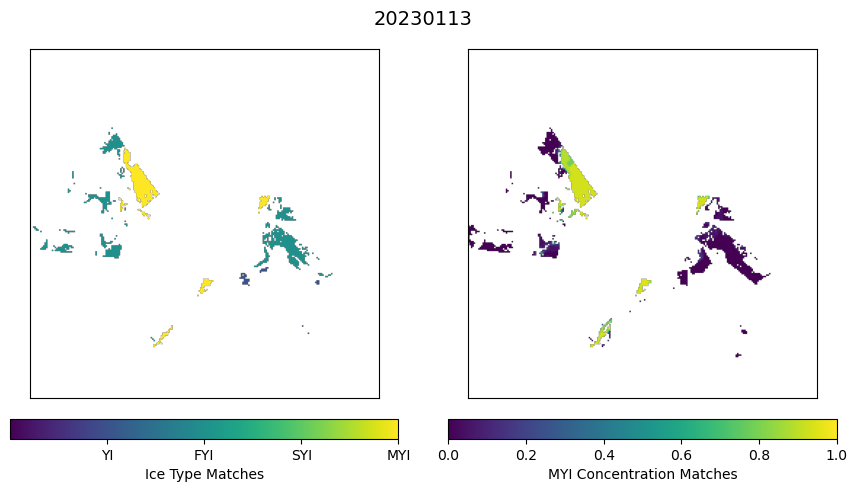

In [58]:
xmin, xmax = 0,240
ymin,ymax = 0, 240

fig, axes = plt.subplots(1, 2, figsize=(9, 5))
fig.suptitle(f"{ds.attrs['date']}", fontsize=14)

# Plot icetype_matches
im1 = axes[0].imshow(ds['icetype_matches'][0,xmin:xmax,ymin:ymax], vmin=0, vmax = 4, cmap='viridis')
im1.cmap.set_under(alpha=0)
axes[0].set_xticks([])
axes[0].set_yticks([])

# Plot icetype_fraction_matches
im2 = axes[1].imshow(ds['myi_concentration_matches'][0,xmin:xmax,ymin:ymax], vmin=0, vmax = 1, cmap='viridis')
axes[1].set_xticks([])
axes[1].set_yticks([])

# Add colorbars below each plot
cbar1 = plt.colorbar(im1, ax=axes[0], orientation='horizontal', pad=0.05, shrink=0.9, label=f'Ice Type Matches')
cbar1.set_ticks([1, 2, 3, 4])
cbar1.set_ticklabels(['YI', 'FYI', 'SYI', 'MYI'])
plt.colorbar(im2, ax=axes[1], orientation='horizontal', pad=0.05, shrink=0.9, label='MYI Concentration Matches')

plt.tight_layout()
plt.show()

#### display data of single dataset: dominant icetype, its concentration, myi concentration, total sea ice concentration

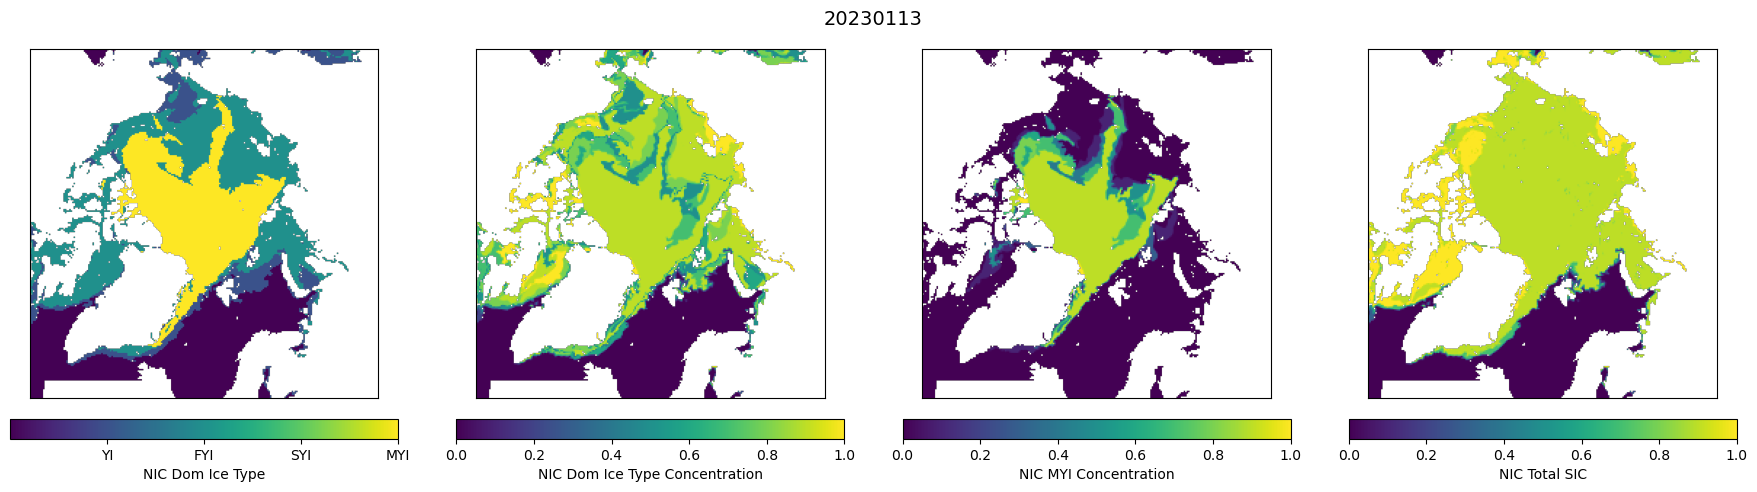

In [59]:
dataset = 'NIC'
xmin, xmax = 0,240
ymin, ymax = 0,240

# Check if total_ice_conc exists for this dataset
has_total_conc = f'{dataset}_total_ice_conc' in ds

# Create figure with appropriate number of subplots
num_plots = 4 if has_total_conc else 3
fig, axes = plt.subplots(1, num_plots, figsize=(18 if has_total_conc else 13.5, 5))
fig.suptitle(f"{ds.attrs['date']}", fontsize=14)

test = np.where(ds[f'{dataset}_dom_icetype_conc'][0,:,:]>=0.0, ds[f'{dataset}_dom_icetype'][0,:,:], np.nan)

# Plot dom_icetype
im1 = axes[0].imshow(test[ymin:ymax,xmin:xmax], vmin=0, cmap='viridis')
axes[0].set_xticks([])
axes[0].set_yticks([])

# Plot dom_icetype_frac
im2 = axes[1].imshow(ds[f'{dataset}_dom_icetype_conc'][0,ymin:ymax,xmin:xmax], vmin=0, cmap='viridis')
axes[1].set_xticks([])
axes[1].set_yticks([])

# Plot myi_conc
im3 = axes[2].imshow(ds[f'{dataset}_myi_conc'][0,ymin:ymax,xmin:xmax], vmin=0, cmap='viridis')
axes[2].set_xticks([])
axes[2].set_yticks([])

# Plot total_conc if it exists
if has_total_conc:
    im4 = axes[3].imshow(ds[f'{dataset}_total_ice_conc'][0,ymin:ymax,xmin:xmax], vmin=0, vmax=1, cmap='viridis')
    axes[3].set_xticks([])
    axes[3].set_yticks([])

# Add colorbars below each plot with titles as labels
cbar1 = plt.colorbar(im1, ax=axes[0], orientation='horizontal', pad=0.05, shrink=0.9, label=f'{dataset} Dom Ice Type')
cbar1.set_ticks([1, 2, 3, 4])
cbar1.set_ticklabels(['YI', 'FYI', 'SYI', 'MYI'])
plt.colorbar(im2, ax=axes[1], orientation='horizontal', pad=0.05, shrink=0.9, label=f'{dataset} Dom Ice Type Concentration')
plt.colorbar(im3, ax=axes[2], orientation='horizontal', pad=0.05, shrink=0.9, label=f'{dataset} MYI Concentration')
if has_total_conc:
    plt.colorbar(im4, ax=axes[3], orientation='horizontal', pad=0.05, shrink=0.9, label=f'{dataset} Total SIC')

plt.tight_layout()
plt.show()



#### functions to experiment with thresholds for matches

In [60]:
def get_match_array(data_dict_25km, threshold=1e-5):
    """
    Computes a consensus ice type array from multiple datasets by identifying pixels where the dominant ice type agrees across datasets.
    For each pixel, the function:
    - Filters out low-confidence or missing data (dominant concentration < 0.8 or value == -77).
    - Stacks the dominant ice type arrays from all datasets.
    - Calculates the standard deviation and mean of the dominant ice type at each pixel, ignoring NaNs.
    - Identifies pixels where at least two datasets agree (standard deviation <= threshold and at least 2 valid values).
    - Assigns the rounded mean ice type value to those pixels; otherwise, assigns -77.
    Parameters
    ----------
    data_dict_25km : dict
        Dictionary where each value is a dict containing:
            - 'dom_icetype': 2D numpy array of dominant ice type codes.
            - 'dom_icetype_conc': 2D numpy array of dominant ice type concentrations.
    threshold : float, optional
        Maximum allowed standard deviation for agreement (default is 1e-5).
    Returns
    -------
    match_value : numpy.ndarray
        2D array of consensus ice type values (int16), with -77 indicating no agreement or insufficient data.
    """
    import numpy as np
    
    # For matching, use concentrations of dominant icetypes to filter for dominant ice types with very high (>=90%) concentrations
    icetype_arrays = []
    for value in data_dict_25km.values():
        dominant_concentration = value['dom_icetype_conc']
        dominant_icetype = value['dom_icetype'].copy().astype(np.float32)
        dominant_icetype[dominant_icetype == -77] = np.nan
        # Use NaN instead of -77 for missing/low confidence data
        dominant_icetype[dominant_concentration < 0.8] = -77
        icetype_arrays.append(dominant_icetype)
    
    # Stack filtered arrays
    icetype_arr = np.stack(icetype_arrays, axis=0)  # Shape: (n_datasets, height, width)
    
    # Calculate std across datasets (ignoring NaN)
    # Where std is ~0, all valid values agree
    with np.errstate(invalid='ignore'):  # Suppress NaN warnings
        std_vals = np.nanstd(icetype_arr, axis=0)
        mean_vals = np.nanmean(icetype_arr, axis=0)
    
    # Count valid (non-NaN) values per pixel
    n_valid = (~np.isnan(icetype_arr)).sum(axis=0)
    
    # Agreement where: std is ~0 and at least 2 valid values
    match_yes = (std_vals <= threshold) & (n_valid >= 2)
    
    # Initialize output array
    match_value = np.full(icetype_arr.shape[1:], -77, dtype=np.int16)
    
    # Store mean value where there's agreement (round to nearest int for ice types)
    match_value[match_yes] = np.round(mean_vals[match_yes]).astype(np.int16)
    
    return match_value


def get_match_array_myi_concentration(data_dict_25km, threshold=0.2):
    """
    Find grid cells where MYI concentration values agree across multiple datasets.
    Vectorized for better performance.
    
    Parameters
    ----------
    data_dict_25km : dict
        Dictionary where keys are dataset names and values are dicts containing
        'myi_conc' arrays with MYI concentration values (0.0 to 1.0 or NaN)
    threshold : float
        Maximum allowed difference between MYI concentrations for agreement (default: 0.1)
        
    Returns
    -------
    match_array : 2D np.ndarray
        Array with mean MYI concentration values where datasets agree, NaN elsewhere
    """
    import numpy as np
    
    # Get all myi_conc arrays
    myi_arrays = []
    
    for value in data_dict_25km.values():
        myi_concentration = value['myi_conc'].copy()
        #myi_concentration[(myi_concentration >= 0.9) | (myi_concentration <= 0.1)] = np.nan
        myi_arrays.append(myi_concentration)
    
    if len(myi_arrays) < 2:
        print(f"Need at least 2 datasets with myi_conc, found {len(myi_arrays)}")
        return np.full_like(myi_arrays[0], np.nan) if len(myi_arrays) > 0 else None
    
    # Stack arrays along new axis
    stacked = np.stack(myi_arrays, axis=0)  # Shape: (n_datasets, height, width)
    
    # Calculate mean across datasets (ignoring NaN)
    mean_myi_conc = np.nanmean(stacked, axis=0)
    
    # For each pixel, check if all finite values are within ±threshold of the mean
    abs_diff = np.abs(stacked - mean_myi_conc)
    # Mask for finite values
    finite_mask = np.isfinite(stacked)
    # For each pixel, check if all finite values are within threshold
    all_within = np.all((abs_diff <= threshold) | ~finite_mask, axis=0)
    # Also require at least 2 finite values
    n_finite = np.sum(finite_mask, axis=0)
    final_mask = (all_within & (n_finite >= 2))
    
    # Create output array
    match_array = np.full(stacked.shape[1:], np.nan, dtype=np.float32)
    match_array[final_mask] = mean_myi_conc[final_mask]
    
    return np.round(match_array, 2)

In [61]:
# restructure the output data from the -nc file to the structure needed for the matching functions
# get dataset names from the datasets_included attribute
datasets = ds.attrs['datasets_included'].split(', ')

# create dictionary with ice type data from the dataset
data_dict = {}
for dataset in datasets:
    data_dict[dataset] = {
    'dom_icetype': ds[f'{dataset}_dom_icetype'][0, :, :].values.filled(-77) if hasattr(ds[f'{dataset}_dom_icetype'][0, :, :].values, 'filled') else ds[f'{dataset}_dom_icetype'][0, :, :].values,
    'dom_icetype_conc': ds[f'{dataset}_dom_icetype_conc'][0, :, :].values,
    'myi_conc': ds[f'{dataset}_myi_conc'][0, :, :].values
}

In [62]:
dom_icetype_match = get_match_array(data_dict)
myi_conc_match = get_match_array_myi_concentration(data_dict)

/home/h_niehaus/.local/share/mamba/envs/gen/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_818195/1548581357.py:42: RuntimeWarning: Mean of empty slice
  mean_vals = np.nanmean(icetype_arr, axis=0)
/tmp/ipykernel_818195/1548581357.py:95: RuntimeWarning: Mean of empty slice
  mean_myi_conc = np.nanmean(stacked, axis=0)


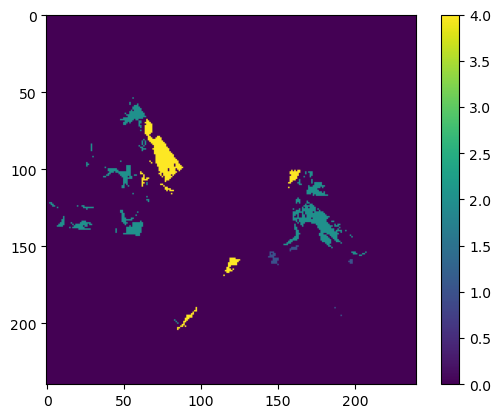

In [63]:
plt.imshow(dom_icetype_match, vmin=0, cmap='viridis')
plt.colorbar()

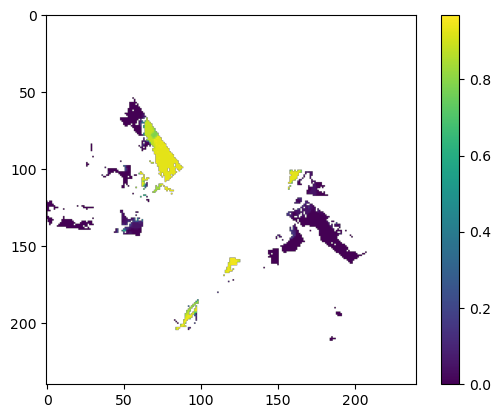

In [64]:
plt.imshow(myi_conc_match, vmin=0, cmap='viridis')
plt.colorbar()